In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [51]:
df = pd.read_csv("Firewall_final_normalized.csv")

df.head()

,0,1,2,3,4,5,6,7
0,0.0,0.0,1.060824e-29,9.554672e-30,0.0,0.99995,0.99993,1.00000
1,0.0,0.0,7.067553e-30,9.554672e-30,0.0,0.99993,0.99993,0.99999
2,0.0,0.0,1.726869e-30,9.554672e-30,0.0,0.99993,0.99993,0.99999
3,0.0,0.0,6.171907e-30,9.554672e-30,0.0,0.99993,0.99993,0.99999
4,0.0,0.5,1.059704e-29,9.554672e-30,0.0,0.99993,0.99993,0.99999


In [52]:
df.shape

(8873, 8)

In [54]:
X = np.array(df.drop(['5','6','7'],1))
y = np.array(df['7'])
y = y.astype("int")

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)



In [57]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,7)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
     #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

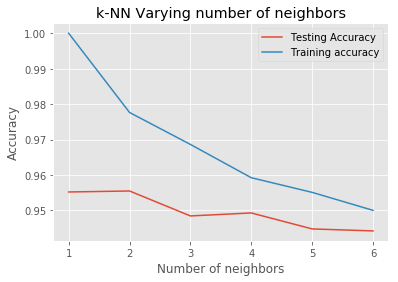

In [58]:


#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()



In [59]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=5)

In [60]:


#Fit the model
knn.fit(X_train,y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [61]:


#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)



0.94478873239436623

In [62]:


#import confusion_matrix
from sklearn.metrics import confusion_matrix



In [63]:


#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)



In [64]:
confusion_matrix(y_test,y_pred)

array([[2931,   60],
       [ 136,  423]])

In [65]:


pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)



Predicted,0,1,All
True,,,
0,2931,60,2991
1,136,423,559
All,3067,483,3550


In [66]:


#import classification_report
from sklearn.metrics import classification_report



In [67]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97      2991
          1       0.88      0.76      0.81       559

avg / total       0.94      0.94      0.94      3550



In [68]:


y_pred_proba = knn.predict_proba(X_test)[:,1]



In [69]:
from sklearn.metrics import roc_curve

In [70]:


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)



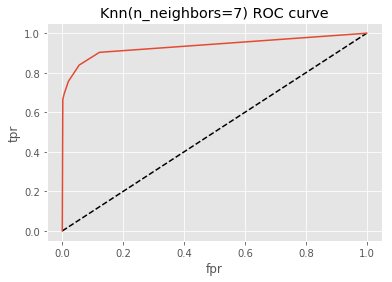

In [71]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [72]:


#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)



0.93548175833403613

In [73]:


#import GridSearchCV
from sklearn.model_selection import GridSearchCV



In [74]:


#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}



In [75]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)



GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [76]:


knn_cv.best_score_



0.92944888989067964

In [77]:


knn_cv.best_params_



{'n_neighbors': 2}